In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
input_path = 'C://projects//alabs_python//date//input//Case Study 3 - Insurance Claims Case Study//'
file_name1 = 'claims.csv'
file_name2 = 'cust_demographics.csv'

In [3]:
claim = pd.read_csv(filepath_or_buffer=input_path+file_name1)
cust = pd.read_csv(filepath_or_buffer=input_path+file_name2)

In [4]:
claim.shape

(1100, 10)

In [5]:
cust.shape

(1085, 6)

In [6]:
final = pd.merge(left=claim, right=cust, left_on='customer_id', right_on='CUST_ID')

In [7]:
final.shape

(1085, 16)

In [8]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [10]:
final['claim_date'] = pd.to_datetime(final['claim_date'],format='%m/%d/%Y')
final['DateOfBirth'] = pd.to_datetime(final['DateOfBirth'], format='%d-%b-%y')

In [11]:
final[['DateOfBirth','claim_date']]

,DateOfBirth,claim_date
0,1979-01-12,2017-11-27
1,1970-01-13,2018-10-03
2,1984-03-11,2018-02-02
3,1986-05-01,2018-06-17
4,1977-05-13,2018-01-13
...,...,...
1080,1981-03-15,2018-09-06
1081,1996-07-07,2017-05-09
1082,1990-04-11,2017-05-15
1083,2064-10-22,2017-04-18


3. Convert the column claim_amount to numeric. Use the appropriate 
modules/attributes to remove the $ sign.

In [13]:
final['claim_amount'].replace('[$]','',regex=True, inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24312\2137106506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['claim_amount'].replace('[$]','',regex=True, inplace=True)


In [14]:
final['claim_amount'] = final.claim_amount.astype('float64')

In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   int64         
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

 4. Of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims.

In [17]:
final['alert_flag'] = final['police_report'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0


In [19]:
a = final.groupby(by = ['customer_id','claim_type'])['claim_id'].count().reset_index()

 5. One customer can claim for insurance more than once and in each claim,
 multiple categories of claims can be involved. However, customer ID 
should remain unique. 

In [21]:
final[~final.duplicated(subset='customer_id', keep='last')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,0
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,0
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,2064-10-22,LA,469-345-5617,Silver,0


In [22]:
a[a['claim_id'] > 1]

,customer_id,claim_type,claim_id
198,19269962,Material only,2
313,30308357,Material only,2
511,47830476,Material only,2
913,85357756,Material only,2


In [23]:
final[final['customer_id'].duplicated()]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag
620,78221963,84147585,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,84147585,Male,1972-10-18,AK,743-569-4783,Gold,1
621,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,85357756,Male,1970-01-02,PA,915-698-3649,Platinum,0
622,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,53539195,Male,1989-10-02,NV,914-342-8239,Gold,0
629,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
630,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
631,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
632,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0


In [24]:
finalu  = final['customer_id'].drop_duplicates()

In [25]:
finalu.shape

(1078,)

In [26]:
final.drop_duplicates(subset=['customer_id'], inplace=True)

In [27]:
final.shape

(1078, 17)

6. Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorical)

In [29]:
final.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alert_flag              0
dtype: int64

In [30]:
round(final['claim_amount'].mean())

12470

In [31]:
round(final['total_policy_claims'].mode())

0    1.0
Name: total_policy_claims, dtype: float64

In [32]:
final['total_policy_claims'].fillna(round(final['total_policy_claims'].mode()), inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24312\874954609.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['total_policy_claims'].fillna(round(final['total_policy_claims'].mode()), inplace=True)


In [33]:
final['claim_amount'].fillna(round(final['claim_amount'].mean()), inplace=True)

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24312\2874950822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final['claim_amount'].fillna(round(final['claim_amount'].mean()), inplace=True)


In [34]:
final.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alert_flag              0
dtype: int64

7. Calculate the age of customers in years. Based on the age, categorize the
 customers according to the below criteria

In [36]:
final['age'] = (final['claim_date'].dt.year - final['DateOfBirth'].dt.year)

In [37]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,38
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,48
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,34
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,32
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,41


In [38]:
final['category'] = final['age'].apply(
    lambda x: 'Children' if x < 18 else ('Youth' if x <= 30 else ('Adult' if x <= 60 else 'Senior')))

In [39]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,48,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,34,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,41,Adult


8. What is the average amount claimed by the customers from various 
segments?

In [41]:
final.groupby(by = 'Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12756.450135
1,Platinum,12369.283934
2,Silver,12269.394509


In [42]:
final.groupby(by = 'Segment').agg(Average_Claim_Amount = ( 'claim_amount', 'mean')).reset_index()

,Segment,Average_Claim_Amount
0,Gold,12756.450135
1,Platinum,12369.283934
2,Silver,12269.394509


 9. What is the total claim amount based on incident cause for all the claims
 that have been done at least 20 days prior to 1st of October, 2018.

In [44]:
start_date = (pd.to_datetime("2018-10-01") - pd.DateOffset(days=20)).date()
end_date = (pd.to_datetime("2018-10-01")).date()
print(start_date)
print(end_date)

2018-09-11
2018-10-01


In [45]:
final[(final['claim_date'] >= '2018-09-11') & (final['claim_date'] <= '2018-10-01')].groupby(
    by = 'incident_cause')['claim_amount'].sum().reset_index() 

,incident_cause,claim_amount
0,Crime,6840.0
1,Driver error,14600.0
2,Natural causes,8418.0
3,Other causes,244986.0
4,Other driver error,47599.5


In [46]:
final.loc[final['claim_date'] < '2018-10-20',:].groupby(by = 'incident_cause')['claim_amount'].sum().reset_index()

,incident_cause,claim_amount
0,Crime,738560.0
1,Driver error,3408510.0
2,Natural causes,1367576.0
3,Other causes,4133357.5
4,Other driver error,3527344.0


In [47]:
final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,48,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,34,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,32,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,41,Adult


10. How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes? 

In [49]:
final[final['incident_cause'] == 'Driver error'].head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,38,Adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,0,19,Youth
16,12548447,1407979,Driver error,2018-06-03,Auto,Unknown,Material only,3208.5,1.0,Yes,1407979,Male,1987-03-15,RI,165-217-1648,Silver,0,31,Adult
24,8782253,1924109,Driver error,2017-09-14,Auto,No,Material only,1690.0,1.0,No,1924109,Male,1981-12-13,UT,431-179-6475,Gold,0,36,Adult
26,71088680,32155446,Driver error,2017-12-24,Auto,No,Material and injury,32640.0,4.0,No,32155446,Male,1985-05-07,AZ,847-936-7645,Gold,0,32,Adult


In [50]:
final[(final['State'].isin(values=['TX','DE','AK'])) & (final['incident_cause'].isin(
    ['Driver error','Natural causes'])) & (final['category'] == 'Adult')].shape[0]

14

11. Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
 the pie chart.

In [52]:
piechart = final.pivot_table(index= 'Segment', columns='gender', values='claim_amount', aggfunc=sum).reset_index()

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24312\1887252329.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  piechart = final.pivot_table(index= 'Segment', columns='gender', values='claim_amount', aggfunc=sum).reset_index()


In [53]:
piechart

gender,Segment,Female,Male
0,Gold,2109759.0,2622884.0
1,Platinum,2369500.0,2095811.5
2,Silver,1898552.0,2346658.5


In [54]:
piechart.index.name = None

In [55]:
piechart

gender,Segment,Female,Male
0,Gold,2109759.0,2622884.0
1,Platinum,2369500.0,2095811.5
2,Silver,1898552.0,2346658.5


In [56]:
pi = final.groupby(by=['Segment', 'gender']).agg(Total=('claim_amount', 'sum')).reset_index()

In [57]:
pi['Lab'] = pi['Segment']+' '+pi['gender']

In [58]:
pi

,Segment,gender,Total,Lab
0,Gold,Female,2109759.0,Gold Female
1,Gold,Male,2622884.0,Gold Male
2,Platinum,Female,2369500.0,Platinum Female
3,Platinum,Male,2095811.5,Platinum Male
4,Silver,Female,1898552.0,Silver Female
5,Silver,Male,2346658.5,Silver Male


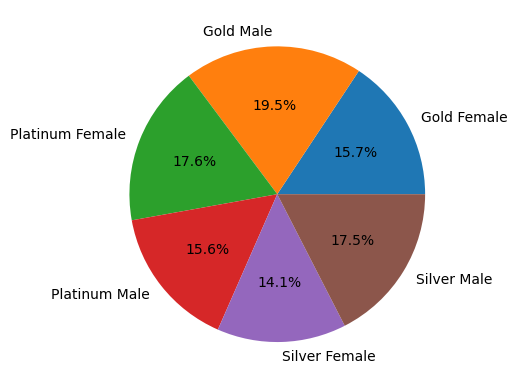

In [59]:
plt.pie(pi['Total'], labels=pi['Lab'], autopct='%1.1f%%')
plt.show()

12. Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart

In [61]:
fmclaim = final.groupby(by=['gender', 'incident_cause'])['customer_id'].count().reset_index(name='Count')

In [62]:
fmclaim

,gender,incident_cause,Count
0,Female,Crime,58
1,Female,Driver error,72
2,Female,Natural causes,92
3,Female,Other causes,156
4,Female,Other driver error,149
5,Male,Crime,50
6,Male,Driver error,184
7,Male,Natural causes,93
8,Male,Other causes,128
9,Male,Other driver error,96


In [63]:
gendercount = fmclaim[fmclaim['incident_cause'].isin(['Driver error','Other driver error'])].groupby(
    by='gender')['Count'].sum() .sort_values(ascending=False).reset_index()

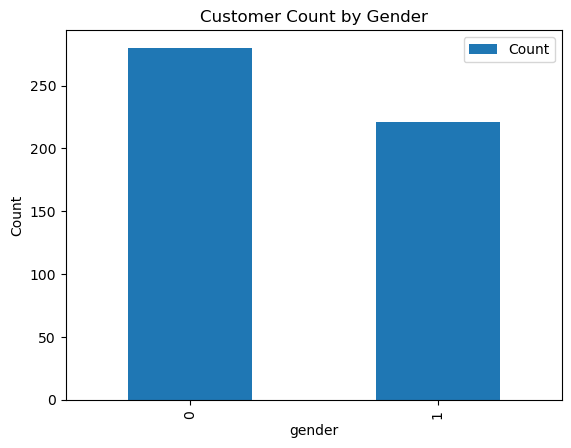

In [64]:
gendercount.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title("Customer Count by Gender")
plt.show()

C:\Users\ANIL KUMAR\AppData\Local\Temp\ipykernel_24312\3209215049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(gendercount, x='gender', y='Count',palette=['pink','blue'])


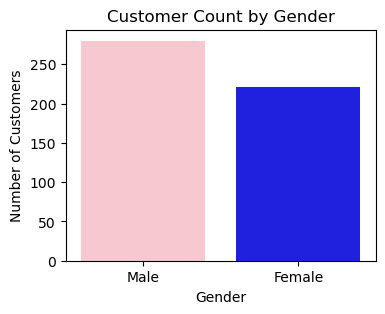

In [65]:
plt.figure(figsize=(4,3))
sns.barplot(gendercount, x='gender', y='Count',palette=['pink','blue'])
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Customer Count by Gender")
plt.show()

13. Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart.

In [67]:
fraud = final[final['fraudulent'] == 'Yes'].groupby(by='category')['fraudulent'].count()

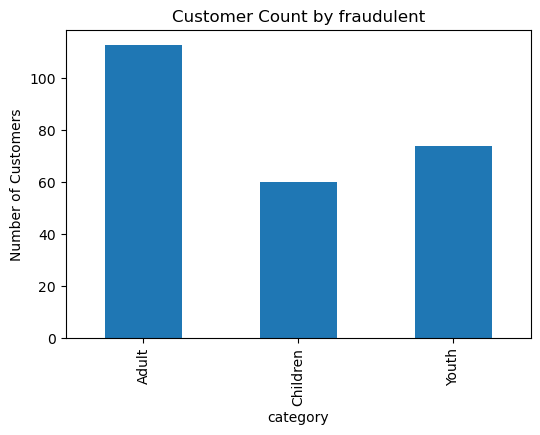

In [68]:
plt.figure(figsize=(6,4))
fraud.plot(kind = 'bar')
plt.xlabel("category")
plt.ylabel("Number of Customers")
plt.title("Customer Count by fraudulent")
plt.show()

 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order.  

In [70]:
monthclaim = final.groupby(by=final['claim_date'].dt.month)['claim_amount'].sum()

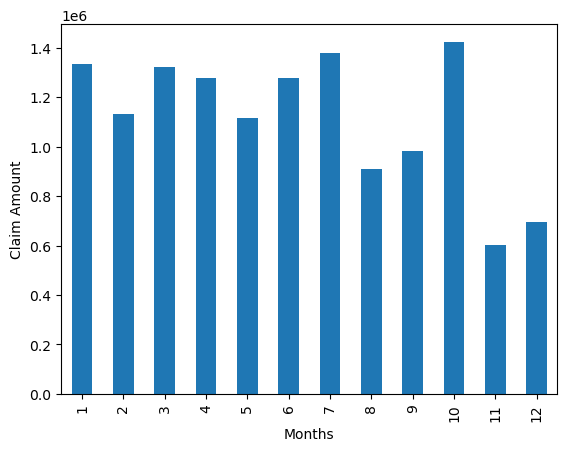

In [71]:
monthclaim.plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Claim Amount')
plt.show()

In [72]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

In [73]:
monthclaim.insert(1,'month','month_order') 

AttributeError: 'Series' object has no attribute 'insert'

15. What is the average claim amount for gender and age categories and 
suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims.

In [ ]:
final.head(1)

In [ ]:
avg_claim = final.groupby(by=['gender','category','fraudulent'])['claim_amount'].mean().reset_index()

In [ ]:
g = sns.FacetGrid(avg_claim, col='fraudulent', height=4, aspect=1.5)
g.map(sns.barplot, 'category', 'claim_amount', 'gender', palette='Set2', order=['Children', 'Youth', 'Adult'])
g.add_legend(title='Gender')
g.set_axis_labels('Age Category', 'Average Claim Amount')
g.set_titles(col_template='Fraudulent: {col_name}')
plt.show()

In [ ]:
16. Is there any similarity in the amount claimed by males and females?
 19. Is there any difference between age groups and insurance claims?
 20. Is there any relationship between total number of policy claims and the 
claimed amount?

In [ ]:
final.groupby(by = 'gender')['claim_amount'].sum().reset_index()

In [ ]:
sns.scatterplot(final, x='category', y='Segment')
plt.show()

 17. Is there any relationship between age category and segment?

In [ ]:
contingency_table = pd.crosstab(final['category'], final['Segment'])
contingency_table

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("There is a significant relationship between age category and segment.")
else:
    print("There is no significant relationship between age category and segment.")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to see the distribution of segments within each age category
sns.countplot(x='category', hue='Segment', data=final, palette='Set2')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Category by Segment')
plt.show()

 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
# Here we will check the pearson coeffecient.

import scipy.stats as stats

# The H0=  No relationship between the 2016-17 claim amounts and current claim amounts,
# Ha= Retionship exists;
# the CI= 95%, p=0.05

# In[485]:


final["Year"]= final['claim_date'].dt.year
    

# In[481]:


#current year as per the data given in 2018


# In[522]:


Current_year= final.loc[final.Year == 2018]["claim_amount"]
amt_2016_17= final.loc[final.Year == 2017]["claim_amount"]


# In[527]:


#performing pearson coeffecient

stats.pearsonr(Current_year,amt_2016_17)


# In[528]:


#not able to perform it

In [ ]:
final.head(1)

In [76]:
female_claims = final.loc[(final['gender'] == 'Female'), ['claim_amount']]
male_claims = final.loc[(final['gender'] == 'Male'), ['claim_amount']]

In [78]:
female_claims.claim_amount
print(female_claims.claim_amount.sum())
print(female_claims.claim_amount.mean())

6377811.0
12102.10815939279


In [ ]:
male_claims.claim_amount
print(male_claims.claim_amount.sum())
print(male_claims.claim_amount.mean())

In [84]:
print(female_claims.claim_amount,'\n')
print(male_claims.claim_amount)

0        2980.0
1        2980.0
2        3369.5
3        1680.0
9        2748.5
         ...   
1072    38950.0
1076     1380.0
1080     1770.0
1081     2800.0
1083     2840.0
Name: claim_amount, Length: 527, dtype: float64 

4        2680.0
5       38306.5
6        1730.0
7        1160.0
8        2620.0
         ...   
1077     2290.0
1078     2320.0
1079     2173.5
1082    33080.0
1084     1490.0
Name: claim_amount, Length: 551, dtype: float64


In [ ]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(male_claims, female_claims, equal_var=False)

In [ ]:
print(f"T-Statistic: {t_stat} \n P-Value: {p_value}")

 17. Is there any relationship between age category and segment?

In [ ]:
final['Segment']

In [ ]:
final['category']

In [ ]:
# Ho There is no relationship between age category and segment
# H1 There is  relationship between age category and segment
# Ci - 0.98 and alpha - 0.02

In [86]:
from scipy.stats import chi2_contingency

In [92]:
contingency_table = pd.crosstab(final['category'], final['Segment'])
contingency_table

Segment,Gold,Platinum,Silver
category,,,
Adult,173,155,156
Children,81,83,81
Youth,117,123,109


In [94]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 1.2559901670730507
p-value: 0.8687969539065461


In [96]:
if p < 0.05:
    print("There is a significant relationship between age category and segment.")
else:
 print("No significant relationship found.")

No significant relationship found.


In [90]:
chi2, p, dof, expected = chi2_contingency([female_claims.claim_amount,male_claims.claim_amount])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

 19. Is there any difference between age groups and insurance claims

In [98]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1084
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   int64         
 1   customer_id          1078 non-null   int64         
 2   incident_cause       1078 non-null   object        
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   object        
 5   police_report        1078 non-null   object        
 6   claim_type           1078 non-null   object        
 7   claim_amount         1078 non-null   float64       
 8   total_policy_claims  1068 non-null   float64       
 9   fraudulent           1078 non-null   object        
 10  CUST_ID              1078 non-null   int64         
 11  gender               1078 non-null   object        
 12  DateOfBirth          1078 non-null   datetime64[ns]
 13  State                1078 non-null   o

In [112]:
final[['category','claim_amount']]

,category,claim_amount
0,Adult,2980.0
1,Adult,2980.0
2,Adult,3369.5
3,Adult,1680.0
4,Adult,2680.0
...,...,...
1080,Adult,1770.0
1081,Youth,2800.0
1082,Youth,33080.0
1083,Children,2840.0


In [114]:
final.pivot_table(columns='category', values='claim_amount', aggfunc='sum')

category,Adult,Children,Youth
claim_amount,6528027.0,2856548.0,4058590.0
